<a href="https://colab.research.google.com/github/SultanDaffaN/Data-Mining-Class/blob/main/Tutorial/1.%20EDA/tutorial_eda_wage_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contoh Exploratory Data Analysis

By Alfan F. Wicaksono
(Fakultas Ilmu Komputer, UI)

<br/>

In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
import gdown

meta_url = 'https://drive.google.com/uc?id='

url = meta_url + '1Ch-lvXhfW6HSc05CNvTP-Nd7EiaaboD1'
output = 'wage-dataset-37830.csv'
gdown.download(url, output, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1Ch-lvXhfW6HSc05CNvTP-Nd7EiaaboD1
To: /content/wage-dataset-37830.csv
100%|██████████| 465k/465k [00:00<00:00, 57.8MB/s]


'wage-dataset-37830.csv'

In [ ]:
# library python untuk pengolahan data tabular
import pandas as pd

In [ ]:
# library python untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns # untuk mempermudah visualisasi

# agar gambar visualisasi kita terlihat baik
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

Kita muat terlebih dahulu data ke memori dengan abstraksi dataframe milik pandas.

In [ ]:
# memuat data kita di dataframe df
df = pd.read_csv("wage-dataset-37830.csv")

In [ ]:
# informasi dasar dari tabel dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [ ]:
# apakah ada missing values?
df.isnull().values.any()

False

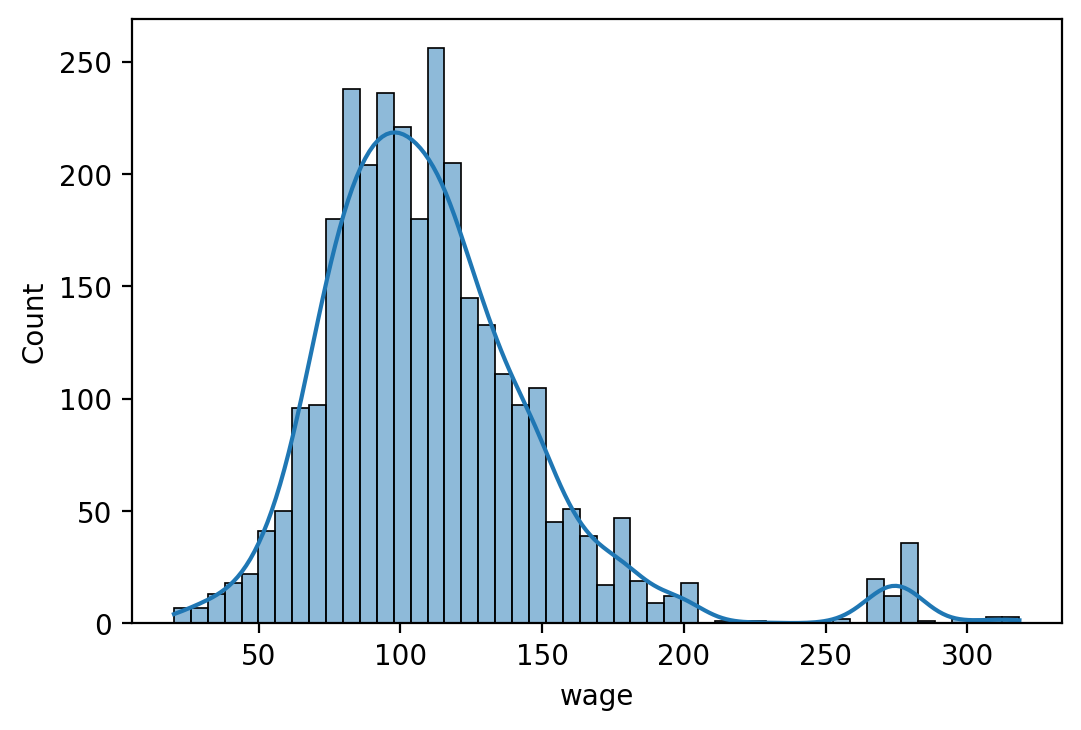

In [ ]:
# plot histogram untuk melihat persebaran nilai dari atribut bertipe numerical.
# di contoh, kita ingin meliha persebaran nilai dari atribut "wage"
sns.histplot(data = df, x = "wage", kde = True)

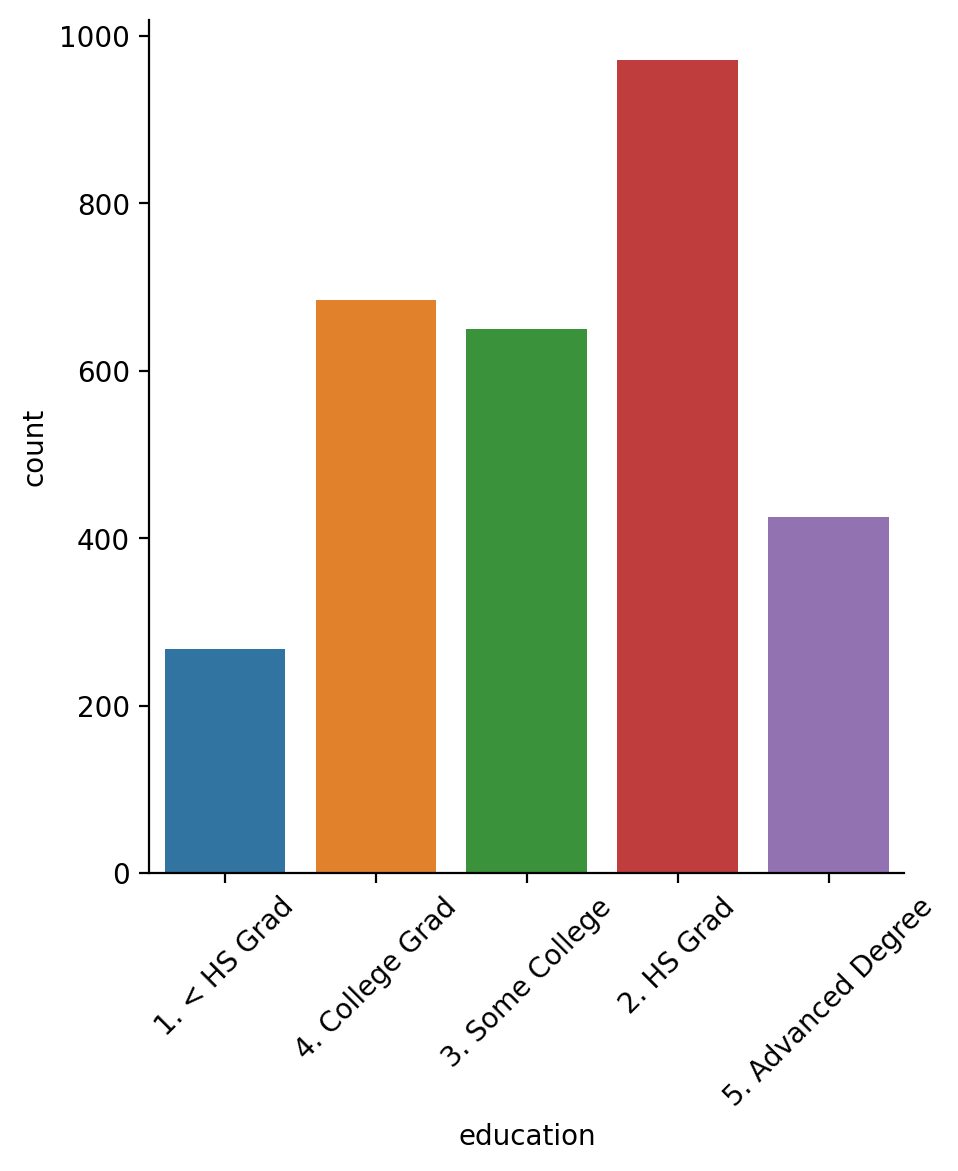

In [ ]:
# Bar plot atau categorical plot dapat digunakan untuk melihat persebaran
# nilai atribut yang bersifat categorical, misal "education"
g = sns.catplot(x = "education", data = df, kind = "count")

# agar tidak overlap, label pada posisi x dirotasi
g.set_xticklabels(rotation = 45)
plt.show()

In [ ]:
# : ---> semua
# loc[baris, kolom]
df.loc[:, "wage"]

0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64

In [ ]:
new_df = df.loc[(df["age"] >= 30) & (df["age"] <= 40)]

# sampai, di memori, ada 2 dataframe: df dan new_df

new_df.head(5)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
11,2007,34,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.397940,81.283253
12,2005,35,1. Male,1. Never Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.494155,89.492480
13,2003,39,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.903090,134.705375
16,2003,37,1. Male,1. Never Married,3. Asian,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.414973,82.679637


In [ ]:
# rata-rata dari wage?
df.loc[:,"wage"].mean()

111.70360820174345

In [ ]:
# skewness dari gaji
df.loc[:,"wage"].skew()

1.6823301828226196

In [ ]:
# kurtosis dari gaji
df.loc[:,"wage"].kurt()

4.83901209250617

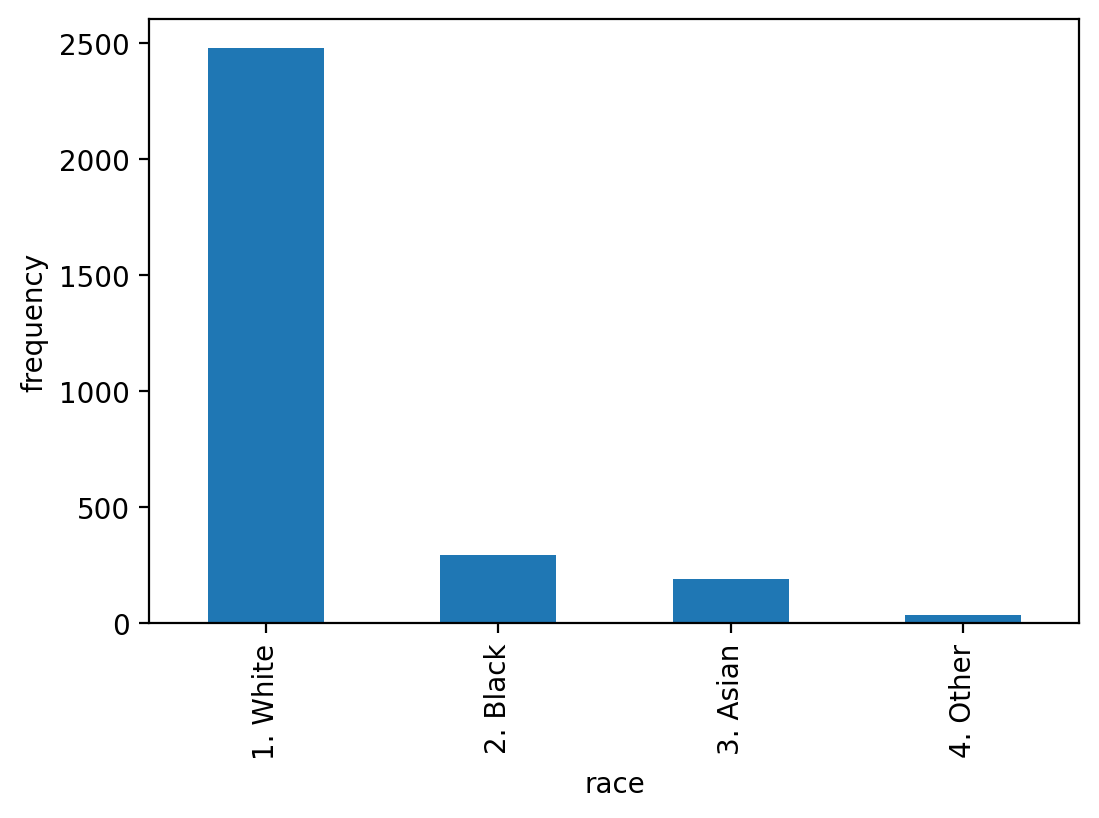

In [ ]:
# frekuensi masing-masing ras
dfg = df.groupby("race")["race"].count()

dfg.plot.bar(ylabel = 'frequency')

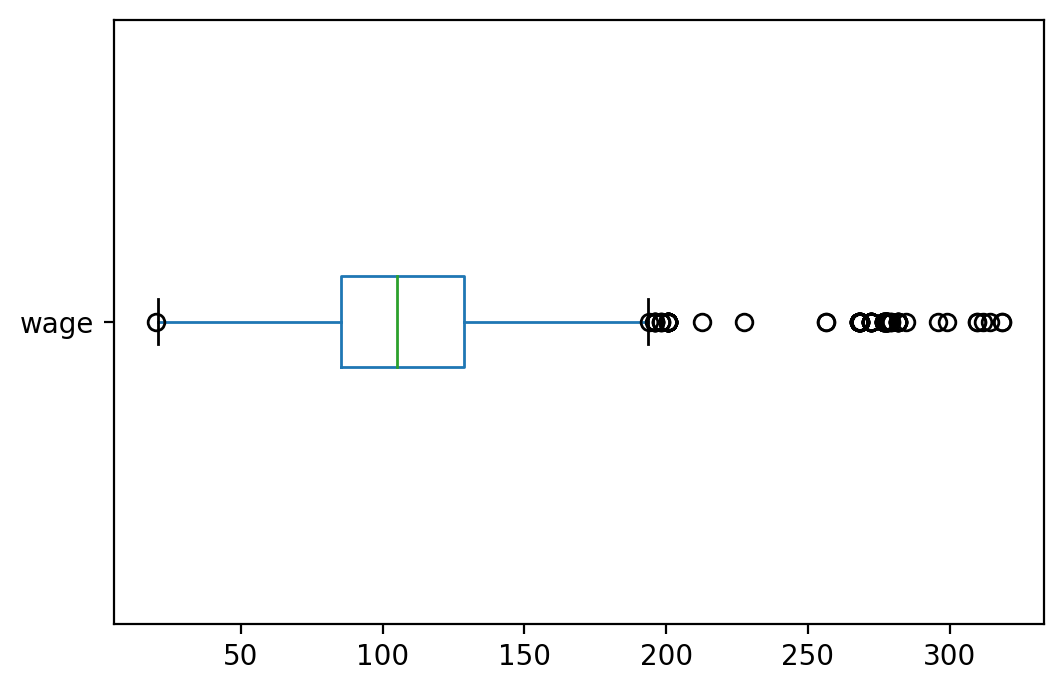

In [ ]:
# boxplot wage
df[["wage"]].boxplot(grid = False, vert = False)

## Merancang Mini Research Questions

1. Seperti apa kaitan antara age dan wage?
2. Apakah ada kaitan antara race dan wage?
3. Apakah ada kaitan antara pendidikan dan jenis pekerjaan?
4. Apakah race merupakan faktor potensial yang mempengaruhi hubungan antara wage dan
age?
5. Apakah education dan jobclass mempunyai effect untuk wage?
6. Seperti apa effect size dari beberapa independent  variable terhadap wage?
 

### Mini RQ 1

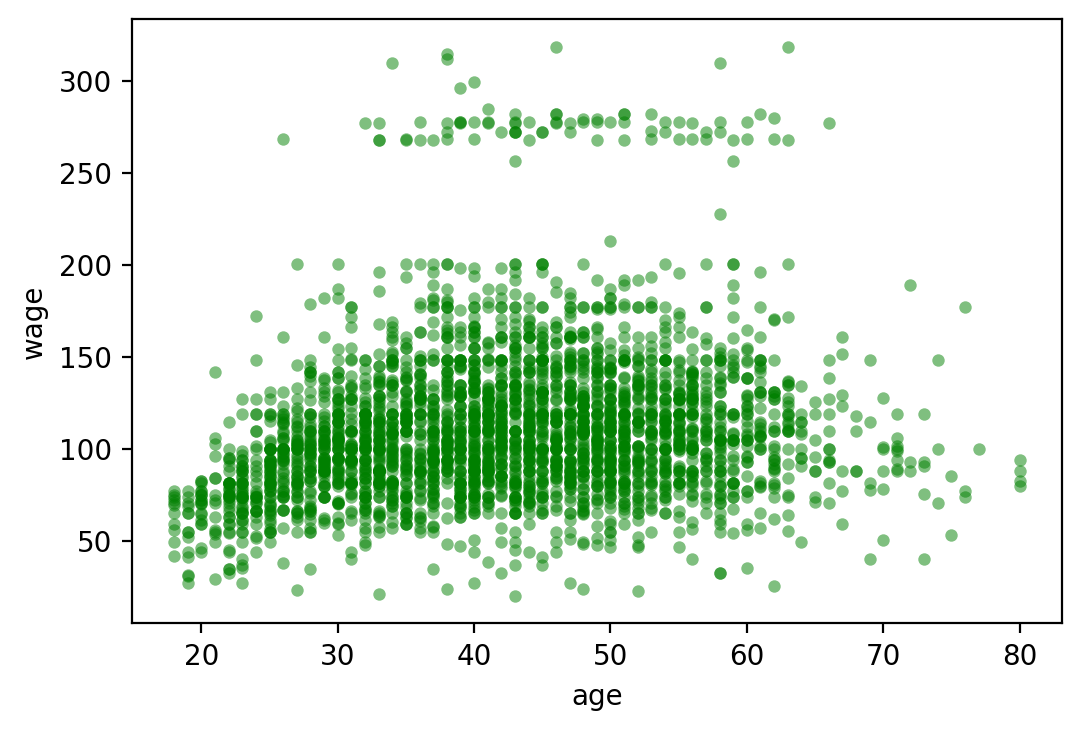

In [ ]:
# question 1
# c : color ---> r, g, b, ...
# alpha : level transparan warna
df.plot.scatter(x = 'age', y = 'wage', c = 'g', alpha = 0.5, linewidth = 0)

In [ ]:
# pearson's correlation coefficient antara umur dan gaji
from scipy.stats import pearsonr

print(pearsonr(df["wage"], df["age"]))

(0.19563720156358863, 2.9007776751953376e-27)


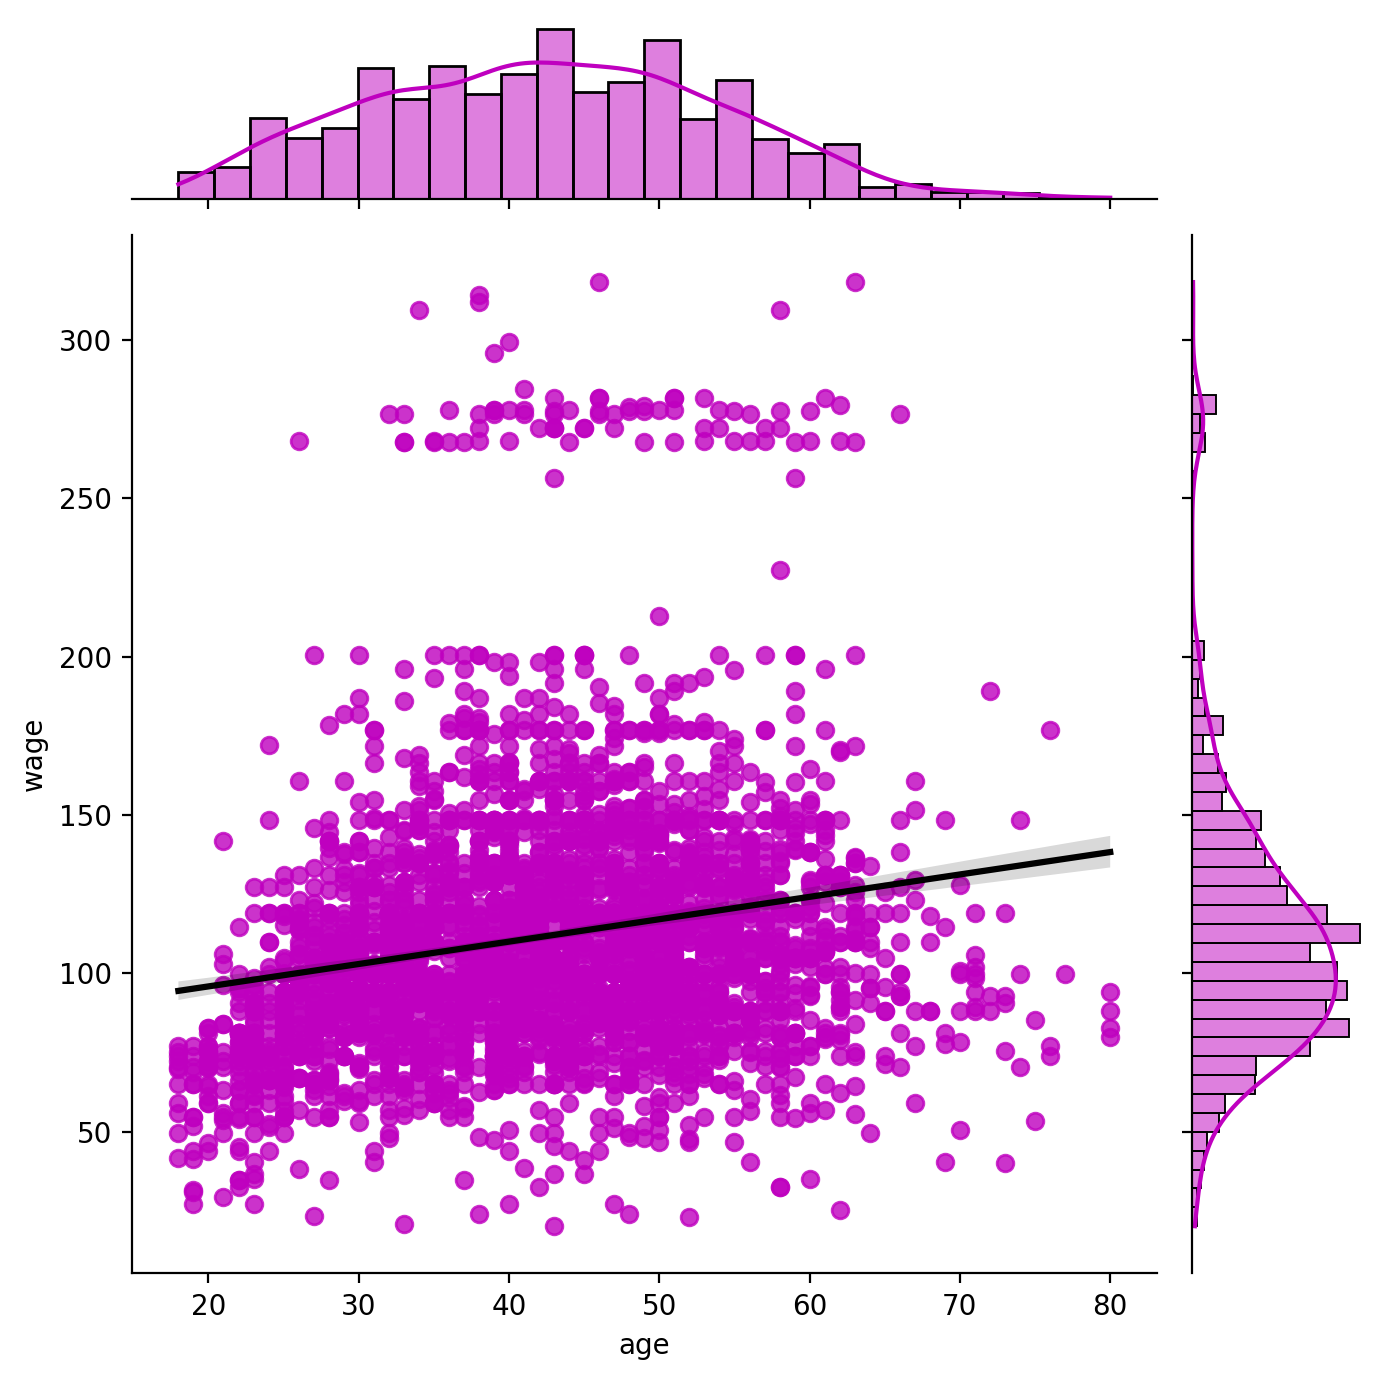

In [ ]:
# scatter plot dari seaborn yang lebih fancy
import seaborn as sns

g = sns.jointplot(data=df, x="age", y="wage",
                  kind="reg", color="m", height=7,
                  joint_kws={'line_kws':{'color':'black'}})

### Mini RQ 2

In [ ]:
# questions 2
# rata-rata wage, distratifikasi berdasarkan 'race'
df.groupby(["race"])["wage"].mean()

race
1. White    112.563666
2. Black    101.601177
3. Asian    120.288288
4. Other     89.973326
Name: wage, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


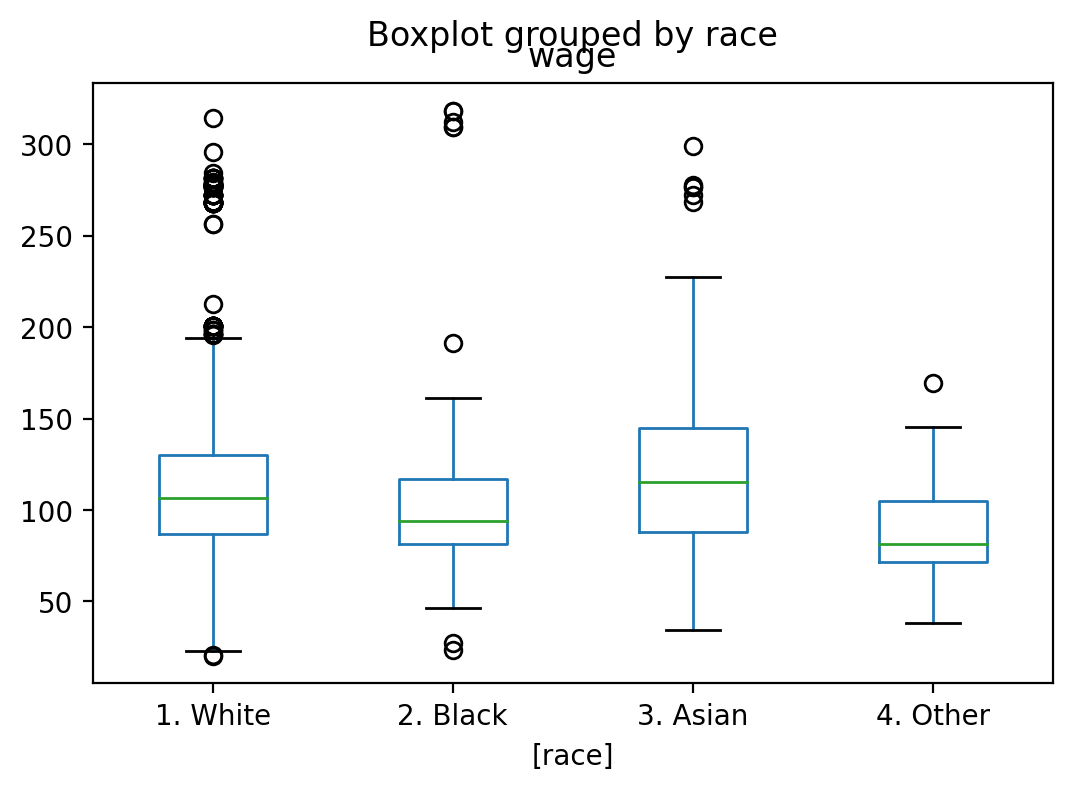

In [ ]:
df[["race", "wage"]].boxplot(by = "race", grid = False)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


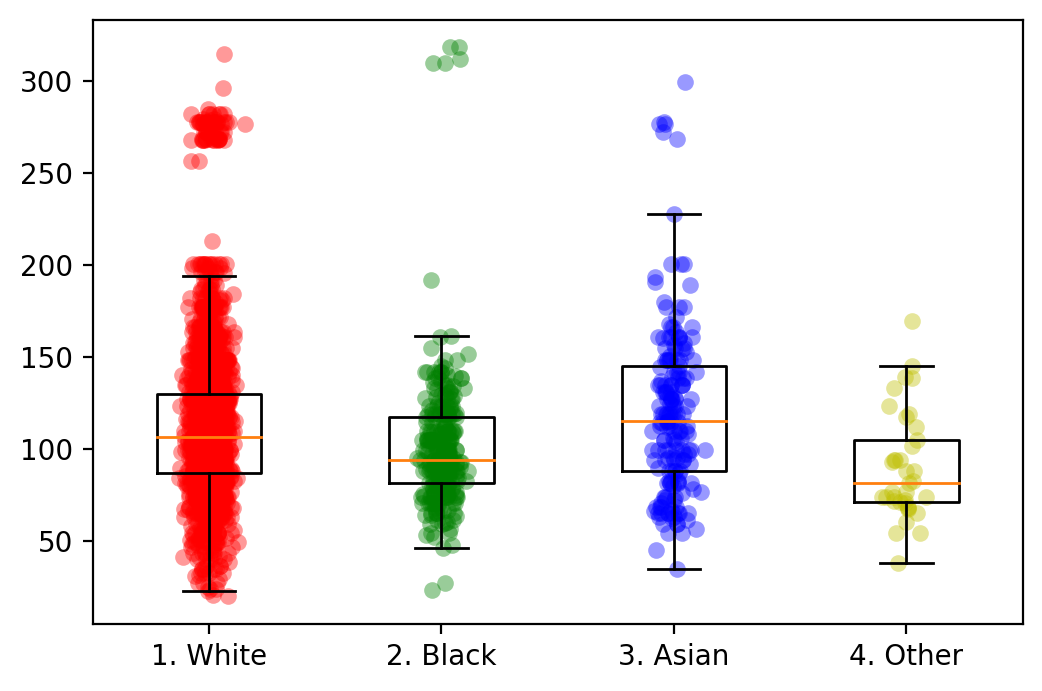

In [ ]:
import numpy as np

fig, ax = plt.subplots()

values, labels, jitters = [], [], []

grouped = df.groupby("race")

position = 1
for key, group in grouped: # perulangan
    values.append(group["wage"].values)
    labels.append(key)
    jitters.append(np.random.normal(position, 0.04, group["wage"].values.shape[0]))
    position += 1
    
# gambar boxplot
ax.boxplot(values, labels=labels, showfliers=False)

# gambar scatter plot di area boxplot, dengan jitter
colors = ['r', 'g', 'b', 'y']
for x, val, c in zip(jitters, values, colors):
    ax.scatter(x, val, alpha=0.4, color=c, linewidth=0)

plt.show()

In [ ]:
# apakah ras mempengaruhi gaji?
# one-way ANOVA test menggunakan Scipy

import scipy.stats as stats

stats.f_oneway(df['wage'][df['race'] == '1. White'],
               df['wage'][df['race'] == '2. Black'],
               df['wage'][df['race'] == '3. Asian'],
               df['wage'][df['race'] == '4. Other'])

F_onewayResult(statistic=12.236674234711575, pvalue=5.890230292195143e-08)

In [ ]:
# apakah ras mempengaruhi gaji?
# one-way ANOVA test menggunakan statsmodel

# tools untuk beberapa statistik yang berguna untuk analisis data
import statsmodels.formula.api as smf
import statsmodels.api as sm

# one-way ANOVA
model = smf.ols('wage ~ C(race)', data = df).fit()
table = sm.stats.anova_lm(model)
print(table)

              df        sum_sq       mean_sq          F        PR(>F)
C(race)      3.0  6.321174e+04  21070.581068  12.236674  5.890230e-08
Residual  2996.0  5.158874e+06   1721.920570        NaN           NaN


ShapiroResult(statistic=0.8810389637947083, pvalue=3.8115318229635024e-43)


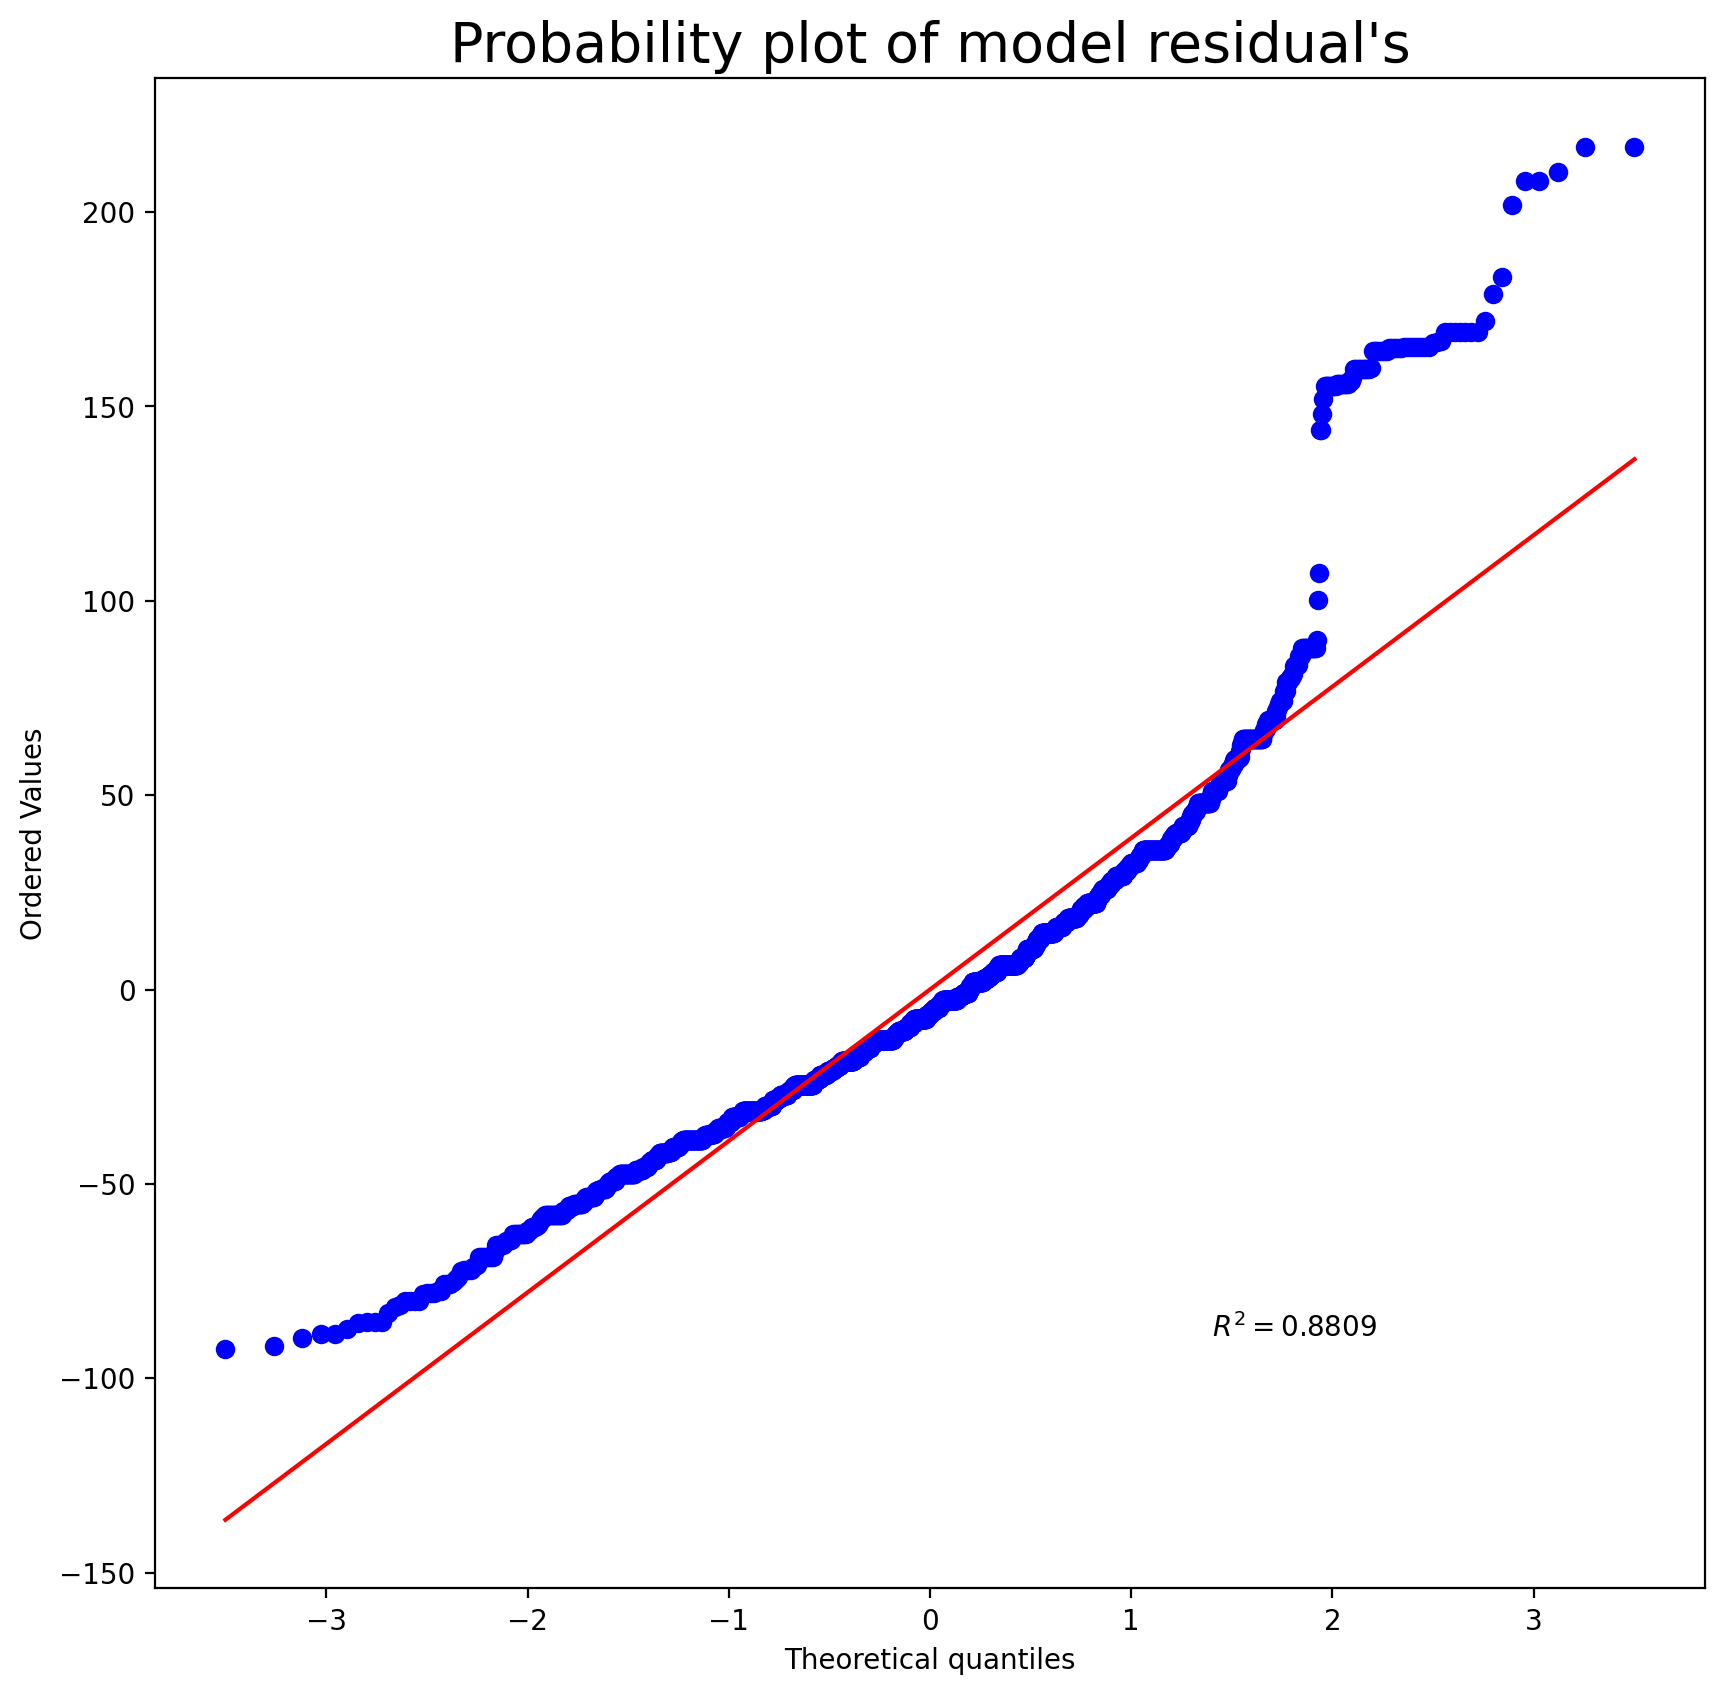

In [ ]:
# kita ingin periksa pakah residual dari model normally distributed
# ANOVA akan akurat jika residual dari model normally distributed
# lihat https://www.pythonfordatascience.org/anova-python/
# jika p-value > 0.05 (tidak significant), residual terdistribusi normal

import scipy.stats as stats

print(stats.shapiro(model.resid))

### plot residual ---> normal jika ia berada di sekitar garis lurus
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue = True)
ax.set_title("Probability plot of model residual's", fontsize = 20)

plt.show()

In [ ]:
# kita perlu periksa apakah setiap group mempunyai variance yang sama
# Levene's test of homogeneity of variances
# jika p-value > 0.05, tidak ada perbedaan significant dalam hal variance antar group
# lihat https://www.pythonfordatascience.org/anova-python/

stats.levene(df['wage'][df['race'] == '1. White'],
               df['wage'][df['race'] == '2. Black'],
               df['wage'][df['race'] == '3. Asian'],
               df['wage'][df['race'] == '4. Other'])

LeveneResult(statistic=6.728809866416505, pvalue=0.00016013512124834307)

Dari hasil One-Way ANOVA di atas, p-value < 0.05 memang mengindikasikan bahwa race mempengaruhi gaji. Namun, beberapa asumsi terkait penggunaan ANOVA tidak terpenuhi (yaitu residual model tidak terdistribusi normal dan variances antar group ada indikasi berbeda). Hal ini menyebabkan hasil ANOVA yang diberikan tidak reliable, dan bisa jadi tidak valid.

### Mini RQ 3

In [ ]:
# question 3: Apakah ada kaitan antara pendidikan dan jenis pekerjaan?
from scipy.stats import chi2_contingency

# pertama, kita membuat contingency table untuk 2 vars tersebut
contigency_tbl = pd.crosstab(df['education'], df['jobclass'])
print(contigency_tbl)

# gunakan Scipy untuk menghitung Chi-squared statistical test
c, p, dof, expected = chi2_contingency(contigency_tbl)
print("p-value =", p)

jobclass            1. Industrial  2. Information
education                                        
1. < HS Grad                  190              78
2. HS Grad                    636             335
3. Some College               342             308
4. College Grad               274             411
5. Advanced Degree            102             324
p-value = 5.998600874359687e-60


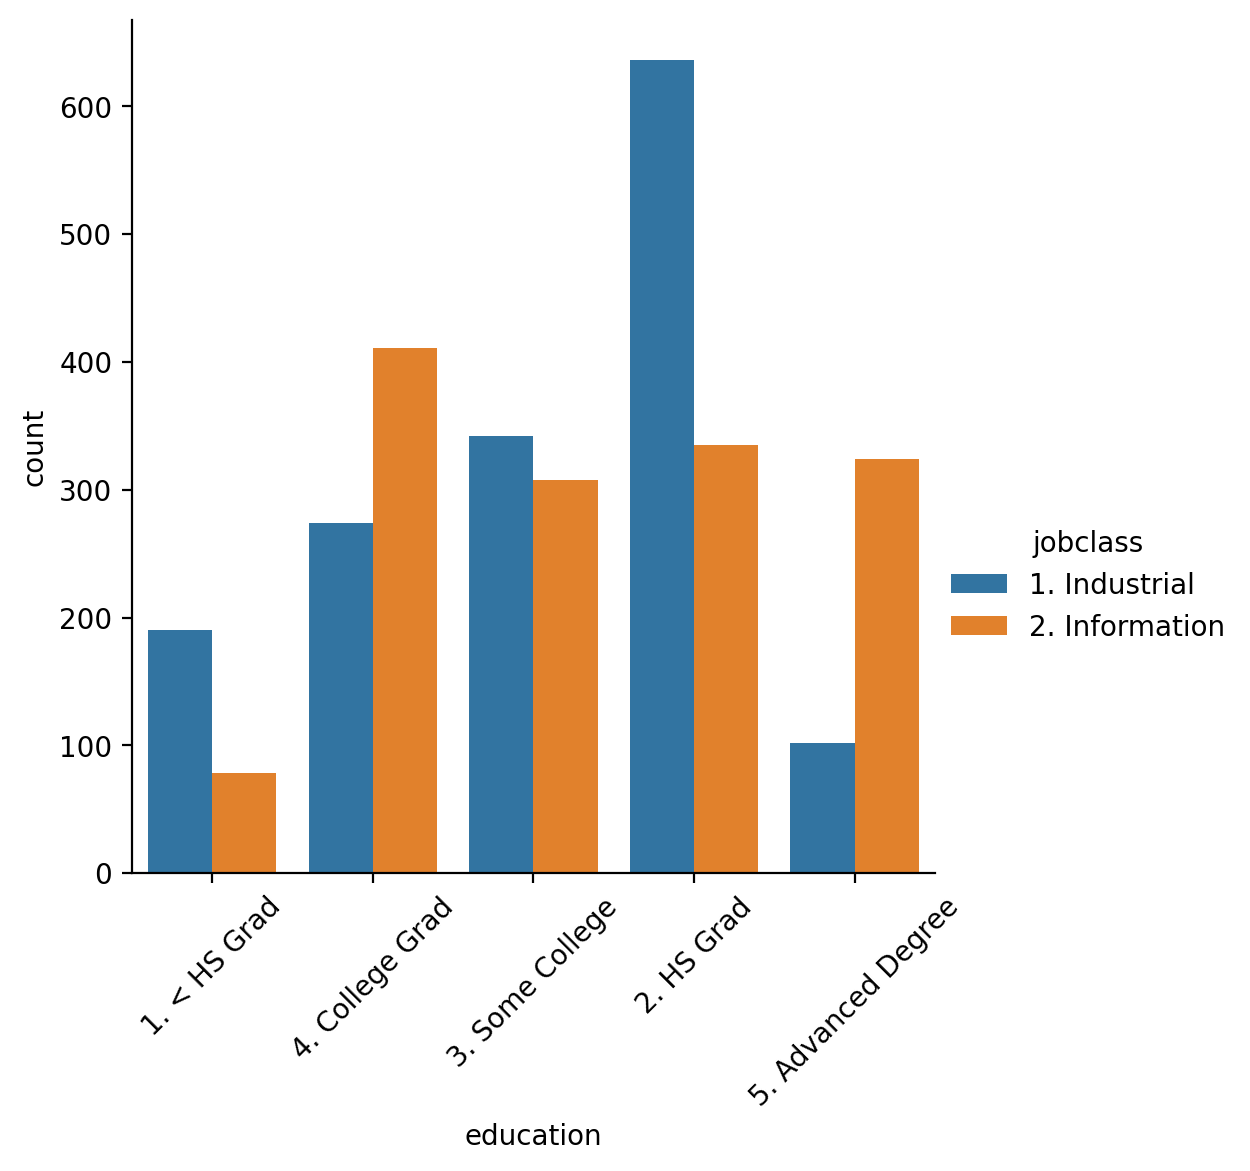

In [ ]:
# kaitan antara pendidikan dan jenis pekerjaan secara visual
g = sns.catplot(x = "education", data = df, \
            kind = "count", hue = 'jobclass')

# agar tidak overlap, label pada posisi x dirotasi
g.set_xticklabels(rotation = 45)
plt.show()

### Mini RQ 4

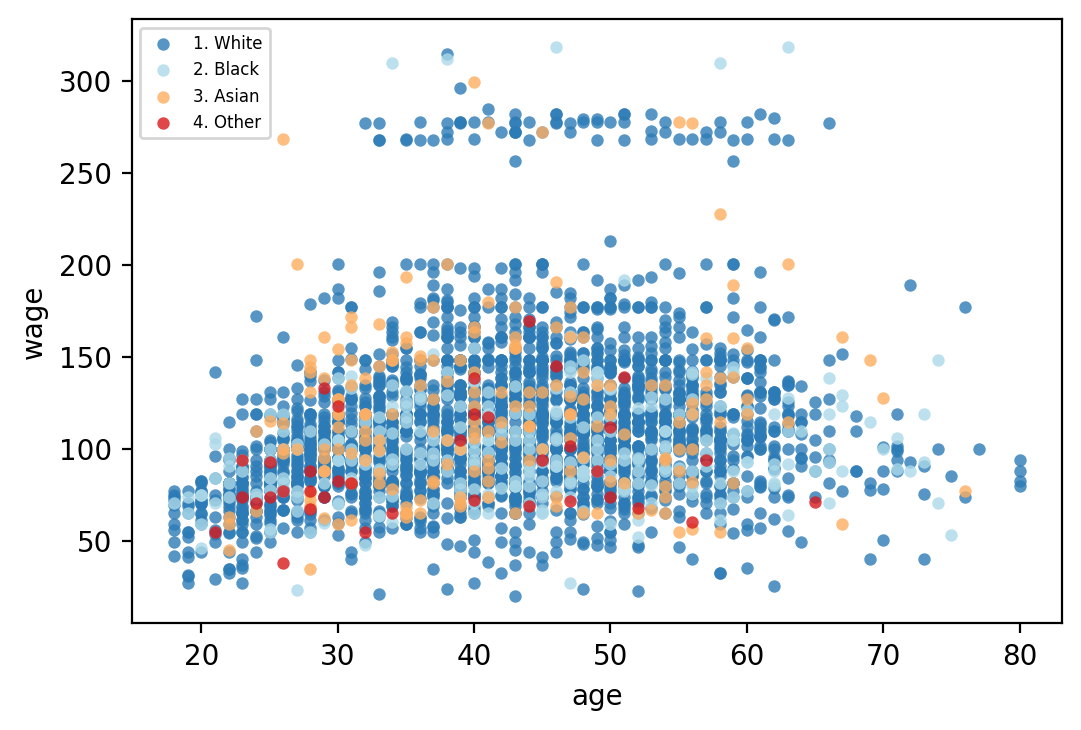

In [ ]:
colors = {'1. White':'#2c7bb6', '2. Black':'#abd9e9', '3. Asian':'#fdae61', '4. Other':'#d7191c'}

fig, ax = plt.subplots()

grouped = df.groupby("race")
for key, group in grouped: # untuk setiap race
    # key akan berisi '1. White', '2. Black', ...
    group.plot(ax=ax, kind='scatter', x='age', y='wage', label=key, color=colors[key], alpha=0.8, linewidth=0)

plt.legend(loc=2, prop={'size': 6}) # ukuran dari legend
plt.show()

In [ ]:
df["education"].unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

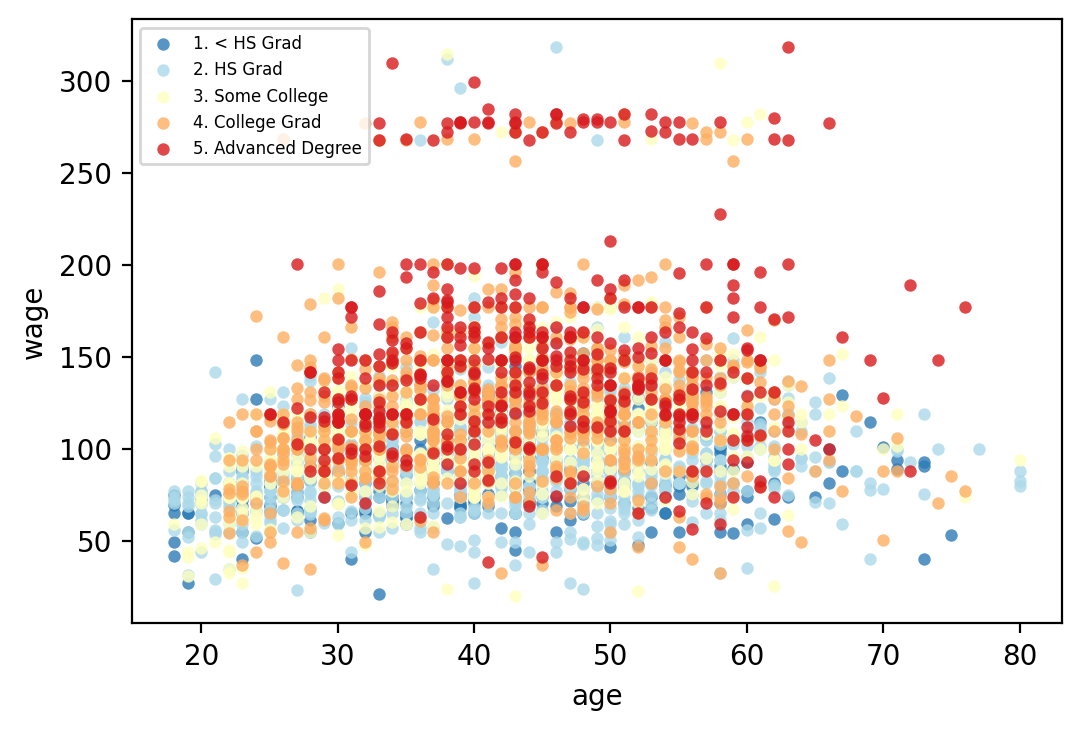

In [ ]:
colors = {'1. < HS Grad':'#2c7bb6', '2. HS Grad':'#abd9e9', '3. Some College':'#ffffbf', '4. College Grad':'#fdae61', '5. Advanced Degree':'#d7191c'}

fig, ax = plt.subplots()

grouped = df.groupby("education")
for key, group in grouped: # untuk setiap race
    # key akan berisi '1. White', '2. Black', ...
    group.plot(ax=ax, kind='scatter', x='age', y='wage', label=key, color=colors[key], alpha=0.8, linewidth=0)

plt.legend(loc=2, prop={'size': 6}) # ukuran dari legend
plt.show()

### Mini RQ 5

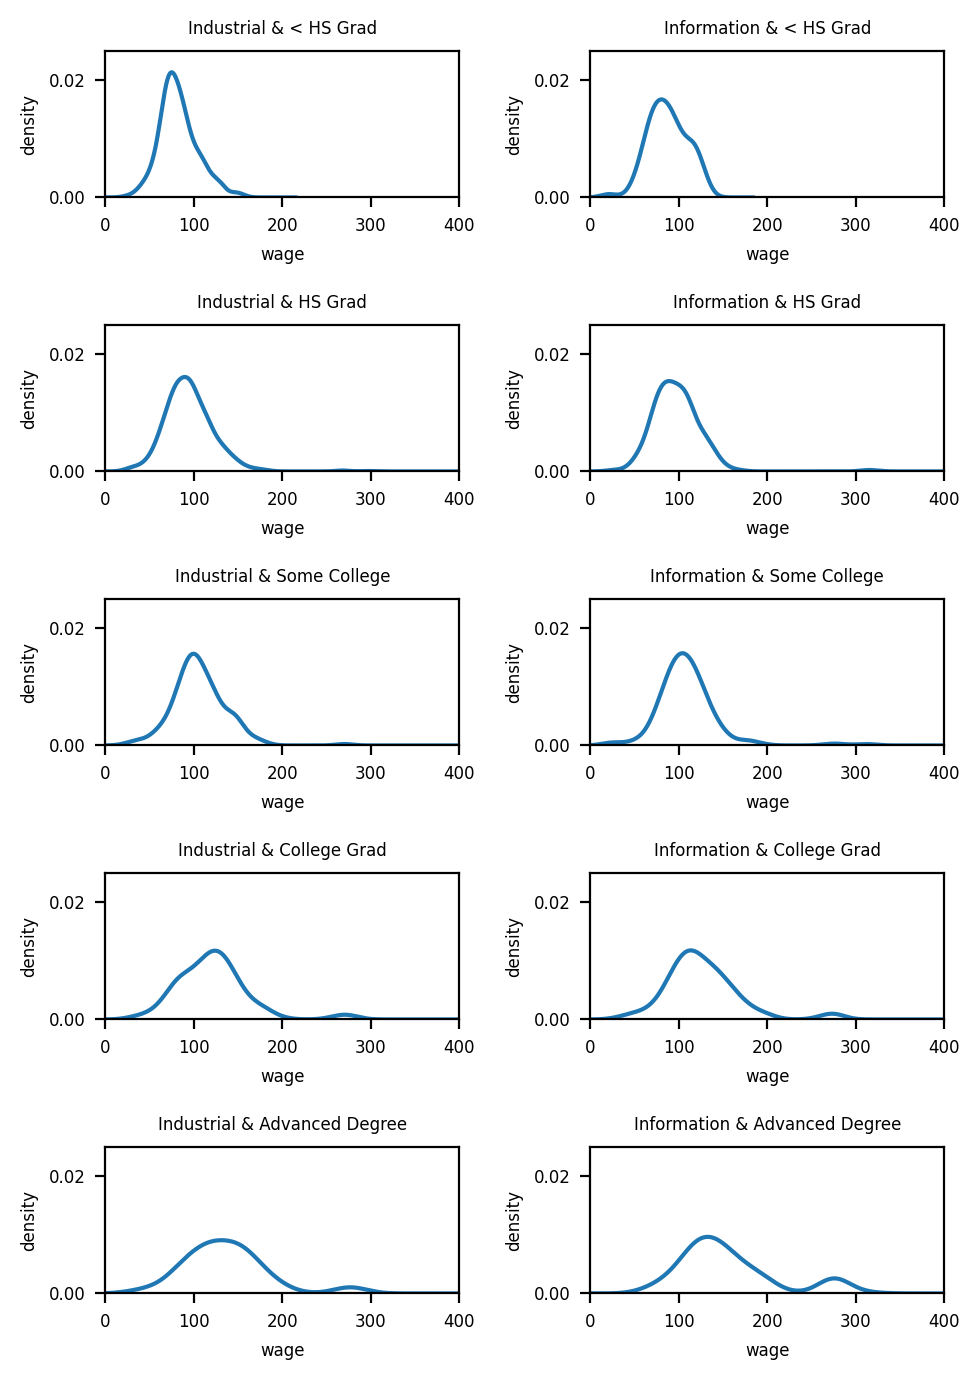

In [ ]:
figure, axis = plt.subplots(5, 2)

i = 0
job_group = df.groupby("jobclass")

for jobclass, df_job in job_group:
    job_edu_group = df_job.groupby("education")
    
    j = 0
    for edu, df_job_edu in job_edu_group:
        
        # kde
        df_job_edu["wage"].plot(ax=axis[j, i], kind='density', \
                                xlim=(0.0, 400.0), ylim=(0.0, 0.025), \
                                fontsize=6, figsize=(5,7))
        
        axis[j, i].set_ylabel("density", fontsize=6)
        axis[j, i].set_xlabel("wage", fontsize=6)
        axis[j, i].set_title(jobclass[3:]+" & "+ edu[3:], fontsize=6)
        
        j += 1
    i += 1
    
plt.tight_layout()
plt.show()

### Mini RQ 6

In [ ]:
# Question: seperti apa effect size dari beberapa independent  variable terhadap wage?

import statsmodels.formula.api as smf

# wage    : variable dependent / target variable / response variable
# sisanya : explanatory variable

# regression analysis ---> variable dependent ---> real
model = smf.ols(formula = 'wage~ age + year + C(race) + C(jobclass) + C(maritl) + C(education) + C(health) + C(health_ins)', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     95.89
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          2.84e-254
Time:                        14:17:10   Log-Likelihood:                -14827.
No. Observations:                3000   AIC:                         2.969e+04
Df Residuals:                    2983   BIC:                         2.979e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Nilai R-squared (dan versi adjusted) adalah tidak relevant dalam kasus kali ini karena kita hanya ingin mengetahui hubungan antara independent dan dependent variable, bukan untuk mengembangkan model untuk memprediksi dependent variable. Signifikansi hubungan antara independent dan dependent variable tidak akan berubah walaupun nilai R-squared adalah 15% atau 90%.

Dalam hal ini, yang paling penting adalah **coefficient** dan nilai **p-value**. Coefficient menandakan seberapa unit mean dari response variable berubah ketika sebuah independent variable terkait berubah 1 uni. **p-value** menandakan seberapa significant coefficient dari sebuah independent variable berbeda dari 0 (p-value untuk test H0: coefficient = 0). Dari regression analysis di atas, dapat kita sampaikan beberapa hal berikut



1.   tidak cukup evidence untuk mengatakan bahwa Asian (yes/no), Other (yes/no), Widowed (yes/no), dan Divorced (yes/no) adalah faktor yang mempengaruhi wage (p-value > 0.05).
2.   sebaliknya, beberapa variable seperti age, advanced_degree, dan health_ins adalah faktor yang mempengaruhi wage (p-value < 0.05)
3.   kita dapat interpretasikan bahwa mean dari wage naik sebesar 0.27 ketika nilai umur/age bertambah 1 tahun.
4.    kita dapat interpretasikan bahwa mean dari wage turun sebesar 17.5 ketika ia tidak mempunyai health insurance.